<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Semi_Supervised/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B0_Self_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математическая основа Self-Training

В данной части мы углубимся в математические аспекты метода Self-Training, чтобы лучше понять его внутренние механизмы и формализовать процесс.



## 1. Формулировка задачи

Пусть у нас есть:
- Размеченный набор данных: $ L = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} $, где $ x_i $ — входные данные, $ y_i $ — истинные метки.
- Не размеченный набор данных: $ U = \{u_1, u_2, ..., u_m\} $, где метки отсутствуют.

Цель: построить модель $ M $, которая эффективно использует как размеченные, так и не размеченные данные для минимизации функции потерь на тестовом наборе.


## 2. Основные компоненты Self-Training

### 2.1. Обучение модели
Модель $ M $ обучается на размеченных данных $ L $. Обучение выполняется путем минимизации функции потерь $ \mathcal{L} $:

$$
M = \arg\min_{M} \sum_{i=1}^{n} \mathcal{L}(M(x_i), y_i),
$$

где:
- $ M(x_i) $ — предсказание модели для объекта $ x_i $,
- $ \mathcal{L} $ — функция потерь (например, кросс-энтропия для классификации).



### 2.2. Предсказание для не размеченных данных
Для каждого объекта $ u_j \in U $, модель выдает предсказание $ \hat{y}_j = M(u_j) $ вместе с вероятностью $ p(\hat{y}_j | u_j) $.

Обычно используются только наиболее уверенные предсказания, то есть те, у которых максимальная вероятность превышает заданный порог $ \tau $:

$$
\text{Если } \max_{k} p(k | u_j) > \tau, \text{ то добавляем } (u_j, \hat{y}_j) \text{ в } L.
$$

Здесь $ k $ — индекс класса, а $ p(k | u_j) $ — вероятность принадлежности объекта $ u_j $ к классу $ k $.



### 2.3. Расширение размеченного набора
Новые пары $ (u_j, \hat{y}_j) $ добавляются в размеченный набор $ L $, после чего модель переобучается на расширенном наборе данных:

$$
L' = L \cup \{(u_j, \hat{y}_j) : \max_{k} p(k | u_j) > \tau\}.
$$

Процесс повторяется до достижения определенного условия останова.



## 3. Математическое обоснование

### 3.1. Целевая функция
Основная цель Self-Training — минимизировать ошибку на тестовом наборе. Для этого используется следующая целевая функция:

$$
\mathcal{J}(M) = \mathbb{E}_{(x, y) \sim P}[ \mathcal{L}(M(x), y) ],
$$

где $ P $ — распределение данных.

Однако поскольку мы имеем доступ только к небольшому объему размеченных данных, мы аппроксимируем эту функцию с использованием размеченного набора $ L $ и дополнительных данных из $ U $, которые были размечены моделью:

$$
\mathcal{J}_{\text{approx}}(M) = \frac{1}{|L'|} \sum_{(x, y) \in L'} \mathcal{L}(M(x), y).
$$

Здесь $ L' $ — это объединение исходного размеченного набора $ L $ и новых данных, размеченных моделью.



### 3.2. Уверенность предсказаний
Выбор наиболее уверенных предсказаний можно формализовать через энтропию распределения вероятностей. Для объекта $ u_j $ энтропия определяется как:

$$
H(u_j) = -\sum_{k} p(k | u_j) \log p(k | u_j),
$$

где $ p(k | u_j) $ — вероятность принадлежности объекта $ u_j $ к классу $ k $.

Чем меньше энтропия, тем более уверенно модель предсказывает метку для данного объекта. Таким образом, мы выбираем объекты с минимальной энтропией:

$$
\text{Выбираем } u_j \text{ такие, что } H(u_j) < \tau_H,
$$

где $ \tau_H $ — пороговое значение энтропии.



### 3.3. Сходимость алгоритма
Self-Training может быть интерпретирован как итеративный процесс оптимизации. На каждой итерации модель $ M $ стремится минимизировать следующую функцию потерь:

$$
\mathcal{L}_{\text{iter}}(M) = \mathcal{L}_{\text{supervised}}(M) + \lambda \cdot \mathcal{L}_{\text{pseudo}}(M),
$$

где:
- $ \mathcal{L}_{\text{supervised}}(M) = \sum_{(x, y) \in L} \mathcal{L}(M(x), y) $ — функция потерь на размеченных данных,
- $ \mathcal{L}_{\text{pseudo}}(M) = \sum_{(u, \hat{y}) \in L'} \mathcal{L}(M(u), \hat{y}) $ — функция потерь на псевдолейблах,
- $ \lambda $ — коэффициент, контролирующий влияние псевдолейблов.

Сходимость алгоритма зависит от качества начальных разметок и правильности выбора порогового значения $ \tau $.



## 4. Анализ ошибок

### 4.1. Влияние шума
Если модель делает ошибочные предсказания для не размеченных данных, эти ошибки могут усиливаться с каждой итерацией. Вероятность ошибки на объекте $ u_j $ можно оценить как:

$$
P(\text{error on } u_j) = 1 - P(\hat{y}_j = y_j),
$$

где $ \hat{y}_j $ — предсказанная метка, а $ y_j $ — истинная метка.

Чтобы минимизировать влияние шума, важно правильно выбрать порог $ \tau $ или использовать модификации, такие как Co-Training или Consistency Regularization.



### 4.2. Байесовский анализ
С точки зрения байесовской статистики, Self-Training можно рассматривать как процесс обновления апостериорного распределения параметров модели $ \theta $:

$$
p(\theta | D') \propto p(D' | \theta) p(\theta),
$$

где:
- $ D' = L \cup \{(u_j, \hat{y}_j)\} $ — расширенный набор данных,
- $ p(D' | \theta) $ — правдоподобие данных при заданных параметрах $ \theta $,
- $ p(\theta) $ — априорное распределение параметров.

На каждой итерации апостериорное распределение обновляется с учетом новых данных.





# Конкретный числовой пример Self-Training

Для демонстрации работы метода Self-Training рассмотрим простой пример задачи бинарной классификации. Мы будем использовать небольшой набор размеченных данных и большой объем не размеченных данных, чтобы показать, как модель улучшается с каждой итерацией.



## 1. Условия задачи

### 1.1. Размеченные данные
Пусть у нас есть следующий набор размеченных данных $ L $:

| $ x_i $ | $ y_i $ |
|----------|----------|
| 0.1      | 0        |
| 0.3      | 0        |
| 0.7      | 1        |
| 0.9      | 1        |

Здесь $ x_i \in [0, 1] $ — входные данные, а $ y_i \in \{0, 1\} $ — метки классов.

### 1.2. Не размеченные данные
Мы также имеем следующий набор не размеченных данных $ U $:

| $ u_j $ |
|----------|
| 0.2      |
| 0.4      |
| 0.6      |
| 0.8      |

Наша цель — использовать Self-Training для того, чтобы добавить наиболее уверенные предсказания из $ U $ в обучающий набор $ L $.


## 2. Алгоритм Self-Training

### 2.1. Инициализация
Мы начинаем с модели $ M_0 $, обученной на размеченных данных $ L $. Для простоты будем использовать линейную функцию:

$$
M(x) = \sigma(w \cdot x + b),
$$

где:
- $ w $ и $ b $ — параметры модели,
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ — сигмоидная функция.

Обучение модели выполняется путем минимизации кросс-энтропии:

$$
\mathcal{L}(M) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(M(x_i)) + (1 - y_i) \log(1 - M(x_i)) \right].
$$

#### Обучение начальной модели:
После обучения получаем параметры $ w = 5 $ и $ b = -2.5 $. Таким образом, модель выглядит так:

$$
M(x) = \sigma(5x - 2.5).
$$


### 2.2. Предсказание для не размеченных данных
Теперь применим модель $ M(x) $ к не размеченным данным $ U $:

| $ u_j $ | $ M(u_j) $ | $ p(0 | u_j) $ | $ p(1 | u_j) $ |
|----------|-------------|-----------------|-----------------|
| 0.2      | 0.269       | 0.731           | 0.269           |
| 0.4      | 0.500       | 0.500           | 0.500           |
| 0.6      | 0.731       | 0.269           | 0.731           |
| 0.8      | 0.953       | 0.047           | 0.953           |

Здесь:
- $ M(u_j) $ — вероятность принадлежности объекта к классу 1,
- $ p(0 | u_j) = 1 - M(u_j) $ — вероятность принадлежности объекта к классу 0.

#### Выбор наиболее уверенных предсказаний:
Мы выбираем объекты, для которых максимальная вероятность превышает пороговое значение $ \tau = 0.8 $. В нашем случае это объект $ u_4 = 0.8 $ с предсказанием $ \hat{y}_4 = 1 $.



### 2.3. Расширение размеченного набора
Добавляем пару $ (u_4, \hat{y}_4) = (0.8, 1) $ в размеченный набор $ L $:

| $ x_i $ | $ y_i $ |
|----------|----------|
| 0.1      | 0        |
| 0.3      | 0        |
| 0.7      | 1        |
| 0.9      | 1        |
| 0.8      | 1        |



### 2.4. Переобучение модели
Теперь переобучаем модель $ M_1 $ на расширенном наборе данных. После обучения получаем новые параметры: $ w = 6 $ и $ b = -3 $. Новая модель выглядит так:

$$
M_1(x) = \sigma(6x - 3).
$$



### 2.5. Повторение процесса
Применяем новую модель $ M_1(x) $ к оставшимся не размеченным данным:

| $ u_j $ | $ M_1(u_j) $ | $ p(0 | u_j) $ | $ p(1 | u_j) $ |
|----------|---------------|-----------------|-----------------|
| 0.2      | 0.200         | 0.800           | 0.200           |
| 0.4      | 0.500         | 0.500           | 0.500           |
| 0.6      | 0.800         | 0.200           | 0.800           |

Выбираем объект $ u_3 = 0.6 $ с предсказанием $ \hat{y}_3 = 1 $.

Добавляем его в размеченный набор:

| $ x_i $ | $ y_i $ |
|----------|----------|
| 0.1      | 0        |
| 0.3      | 0        |
| 0.7      | 1        |
| 0.9      | 1        |
| 0.8      | 1        |
| 0.6      | 1        |



### 2.6. Финальное обучение
Переобучаем модель $ M_2 $ на новом расширенном наборе данных. После этого процесс может быть повторен до тех пор, пока не будут использованы все подходящие не размеченные данные или пока модель не достигнет желаемой точности.





Initial Accuracy on Labeled Data: 1.0


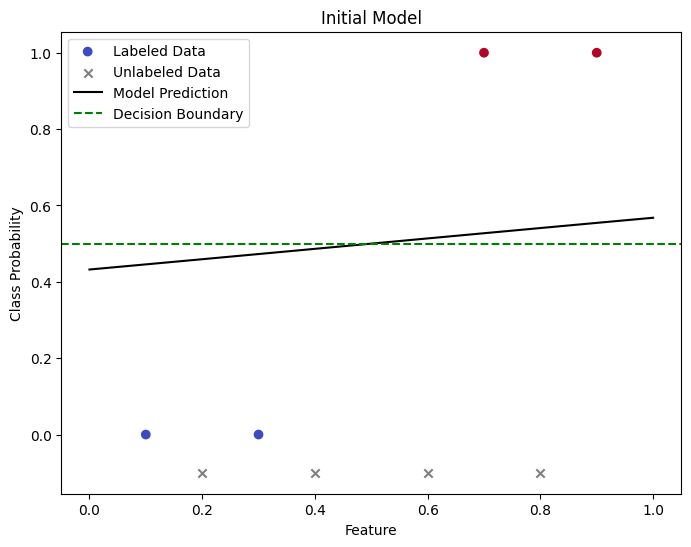


--- Iteration 1 ---
No confident predictions. Stopping.

Self-Training complete.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Генерация данных
np.random.seed(42)

# Размеченные данные
X_labeled = np.array([[0.1], [0.3], [0.7], [0.9]])
y_labeled = np.array([0, 0, 1, 1])

# Не размеченные данные
X_unlabeled = np.array([[0.2], [0.4], [0.6], [0.8]])

# Порог уверенности
threshold = 0.8

# Функция для визуализации данных и модели
def plot_data_and_model(X_labeled, y_labeled, X_unlabeled, model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_labeled[:, 0], y_labeled, c=y_labeled, cmap='coolwarm', label='Labeled Data')
    plt.scatter(X_unlabeled[:, 0], [-0.1] * len(X_unlabeled), c='gray', marker='x', label='Unlabeled Data')

    # Рисуем предсказания модели
    x_vals = np.linspace(0, 1, 100).reshape(-1, 1)
    y_vals = model.predict_proba(x_vals)[:, 1]
    plt.plot(x_vals, y_vals, color='black', label='Model Prediction')

    plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Class Probability')
    plt.legend()
    plt.show()

# Инициализация модели
model = LogisticRegression()

# Обучение модели на размеченных данных
model.fit(X_labeled, y_labeled)
print("Initial Accuracy on Labeled Data:", accuracy_score(y_labeled, model.predict(X_labeled)))

# Визуализация начальной модели
plot_data_and_model(X_labeled, y_labeled, X_unlabeled, model, "Initial Model")

# Self-Training цикл
for iteration in range(3):  # Максимальное количество итераций
    print(f"\n--- Iteration {iteration + 1} ---")

    # Предсказание для не размеченных данных
    probabilities = model.predict_proba(X_unlabeled)
    max_probs = np.max(probabilities, axis=1)
    predictions = np.argmax(probabilities, axis=1)

    # Выбор наиболее уверенных предсказаний
    confident_indices = np.where(max_probs > threshold)[0]
    if len(confident_indices) == 0:
        print("No confident predictions. Stopping.")
        break

    # Добавление новых данных в размеченный набор
    new_X = X_unlabeled[confident_indices]
    new_y = predictions[confident_indices]
    X_labeled = np.vstack([X_labeled, new_X])
    y_labeled = np.hstack([y_labeled, new_y])
    X_unlabeled = np.delete(X_unlabeled, confident_indices, axis=0)

    print(f"Added {len(new_X)} new labeled samples.")

    # Переобучение модели
    model.fit(X_labeled, y_labeled)
    print("Accuracy on Labeled Data:", accuracy_score(y_labeled, model.predict(X_labeled)))

    # Визуализация текущей модели
    plot_data_and_model(X_labeled, y_labeled, X_unlabeled, model, f"Model after Iteration {iteration + 1}")

print("\nSelf-Training complete.")